In [46]:
!pip install scikit-multilearn
!pip install transformers
!pip install emoji

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Thư viện

In [48]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
from sklearn.naive_bayes import ComplementNB
import seaborn as sb
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import joblib
import nltk
from sklearn.multioutput import MultiOutputClassifier

from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPool1D, Dense, Flatten, Dropout, GRU, Bidirectional

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score
import pandas as pd
import re
import seaborn as sns
import emoji
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from keras.models import load_model
from joblib import dump
import torch
import pandas as pd
import numpy as np

# Thu vien transformer cho Classification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification

# Xu ly label
from sklearn.preprocessing import LabelEncoder

# Metric danh gia 
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Ve do thi
import seaborn as sn
import matplotlib.pyplot as plt

# Đọc dữ liệu

In [49]:
df_train = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/ACD_data/ACD_train.csv')
df_dev = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/ACD_data/ACD_dev.csv')
df_test = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/ACD_data/ACD_test.csv')

df_train.head(10)

,comment,aspect
0,Giá 53k size vừa.,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Nhưng nói chung cũng hơi đắt.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
2,Mình ăn rất hôi mùi dầu.,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
3,Mình ăn chưa baoh thấy mùi hôi hải sản.,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,3 dĩa vs 2 lon Revive mà có 190k thui(.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
5,Ở đây ngay khu vắng nên khách cũng không đông ...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
6,"Quán đông lắm, gọi món phải đợi hơi lâu, ko bi...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]"
7,"Mình uống trà sữa lài hạnh nhân khá thơm nha, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
8,"Không gian trang trí đơn giàn mà ấm cúng, nên ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9,Chè lạnh thì hình như lúc nào cũng là sương sa...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"


In [50]:
len(df_train), len(df_dev), len(df_test)

(7028, 771, 1938)

# Hàm tiền xử lý

In [51]:
# Xóa code html
def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

# xóa link
def remove_url(document):
    document = re.sub(r"(http\S+)|(www\S+)", '', document)
    return document

# xóa tag user
def remove_tag_user(document):
    document = re.sub(r"(@\w{1,15})", '', document)
    return document

# xóa hashtags
def remove_hashtags(document):
    document = re.sub("#(\w{1,})", '', document)
    return document

# Chuẩn hóa unicode
import regex as re
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

# Chuẩn hóa dấu tiếng việt
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']
nguyen_am_to_ids = {}
for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)
def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word
    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9: 
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5: 
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word
    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  
            chars[index] = bang_nguyen_am[x][dau_cau]
            return ''.join(chars)
    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
        else:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    return ''.join(chars)
def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True
def chuan_hoa_dau_cau_tieng_viet(sentence):
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

# VNCoreNLP tách từ
!pip install deplacy vncorenlp
!test -d VnCoreNLP || git clone --depth=1 https://github.com/vncorenlp/VnCoreNLP
from vncorenlp import VnCoreNLP
vncorenlp = VnCoreNLP("VnCoreNLP/VnCoreNLP-1.1.1.jar",annotators="wseg")
def vncore_tokenize(document):
    l = vncorenlp.tokenize(document)[0]
    document = ''
    for i in range(len(l)):
        document += l[i] + ' '
    document = document[:-1]
    return document

# Stopword
def stopword(path):
    stopwords = []
    f = open(path, 'r')
    for line in f:
        line = line.rstrip()
        line = line.replace(' ', '_')
        stopwords.append(line)
    f.close()
    return stopwords
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/vietnamese-stopwords.txt'
stopwords = stopword(path)
def remove_stopword(text):
    text_new = ''
    list_word = text.split()
    for word in list_word:
        if word not in stopwords:
            text_new += word + ' '
    text_new = text_new[:-1]
    return text_new

# Chuẩn hóa từ về dạng chuẩn (ngonnnn thành ngon)
def standardize_word(text):
    new_text = []
    for i in range(len(text)):
        if i == 0 or (text[i-1] != text[i]):
            new_text.append(text[i])
    new_text = "".join(new_text)
    return new_text

# Chuyển emotion, emoji thành word form
def load_emoticon_to_word_dict(file_path):
    the_dict = pd.read_excel(file_path).to_dict()
    emoticon_to_word = dict((v,key) for key,value in the_dict.items() for v in value.values() if type(v) is str)
    return emoticon_to_word
def load_word_dict_to_vietnameses(file_path):
    eng_to_vie_df = pd.read_excel(file_path)
    eng_to_vie = dict(zip(eng_to_vie_df.Emojize, eng_to_vie_df.Translated))
    return eng_to_vie
emoticon_to_word = load_emoticon_to_word_dict("/content/drive/MyDrive/NLP for Data Science/NLP_Project/emoticon-emoji.xlsx")
word_to_vietnamese = load_word_dict_to_vietnameses("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Emoji_to_VN.xlsx")
punct_to_remove = """(<[/:.,;`~-'"@#*+=\]>)"""
def emo_to_word_form(text, emoticon_to_word, punct_to_remove):
    #Change emoji to word form
    new_text = emoji.demojize(text)
    #Change emoticon to word form
    word_list = [emoticon_to_word[k] if k in emoticon_to_word.keys() else k for k in new_text.split(" ")] 
    new_text = " ".join(word_list)
    #Add space between punctuations such as ([:.,!?()])
    new_text = re.sub('([:.,!?()])', r' \1 ', new_text) 
    #Remove some punctuation
    text_remove_punct = [new_text[i] if new_text[i] not in punct_to_remove else '' for i in range(len(new_text))]
    new_text = "".join(text_remove_punct)
    #Remove extra space
    new_text = re.sub(' +', ' ', new_text)
    new_text = re.sub(r'\s+', ' ', new_text).strip()
    return new_text

# Chuyển word form sang tiếng việt
def work_form_to_vietnamese(text, word_to_vietnamese):
    word_list_word_to_viet = []
    for word in text.split(" "):
        if word in word_to_vietnamese.keys():
            word = word_to_vietnamese[word]
        if '_' in word:
            continue
        word_list_word_to_viet.append(word)
    new_text = " ".join(word_list_word_to_viet)
    return new_text

# Chuyển 100k thành giá tiền
def money(text):
    text = re.sub('(\d+k)|(\d+ k)|(\d+đồng)|(\d+ đồng)|(\d+ngàn)|(\d+ ngàn)|(\d+nghìn)|(\d+ nghìn)', 'giá tiền', text)
    return text

In [52]:
# Preprocessing final
def text_preprocess(document):
    # chuẩn hóa unicode
    document = convert_unicode(document)
    # chuẩn hóa cách gõ dấu tiếng Việt
    document = chuan_hoa_dau_cau_tieng_viet(document)

    # xóa html code
    document = remove_html(document)
    # xóa link
    document =  remove_url(document)
    # xóa tag user
    document = remove_tag_user(document)
    # xóa hashtags
    document =  remove_hashtags(document)

    # Đưa từ về dạng chuẩn
    document = standardize_word(document)
    # Chuyển emotion, emoji thành word form
    document = emo_to_word_form(document, emoticon_to_word, punct_to_remove)
    # Chuyển word form sang Vietnamese.
    document = work_form_to_vietnamese(document, word_to_vietnamese)
    # Chuẩn hóa giá tiền
    document = money(document)
    # tách từ
    document = vncore_tokenize(document)
    # # đưa về lower
    document = document.lower()
    # # xóa stopword
    document = remove_stopword(document)
    # # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]', ' ', document)
    # # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()

    return document

In [56]:
# Tiền xử lý comment
def preprocessing_comment(df):
    for i in range(len(df)):
        comment = df['comment'][i]
        df['comment'][i] = text_preprocess(comment)
    return df

df_train = preprocessing_comment(df_train)
df_dev = preprocessing_comment(df_dev)
df_test = preprocessing_comment(df_test)

df_train.head()

,comment,aspect
0,giá giá tiền size,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,hơi đắt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
2,hôi mùi dầu,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
3,baoh mùi hôi hải_sản,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,3 dĩa vs 2 lon revive giá tiền thui,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"


,comment,aspect
0,giá giá tiền size,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,hơi đắt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
2,hôi mùi dầu,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
3,baoh mùi hôi hải_sản,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,3 dĩa vs 2 lon revive giá tiền thui,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"


# X và y

In [58]:
X_train = df_train['comment'].values
X_dev = df_dev['comment'].values
X_test = df_test['comment'].values

y_train = df_train['aspect'].values
y_dev = df_dev['aspect'].values
y_test = df_test['aspect'].values

y_train = np.array(list(y_train), dtype=np.float)
y_dev = np.array(list(y_dev), dtype=np.float)
y_test = np.array(list(y_test), dtype=np.float)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


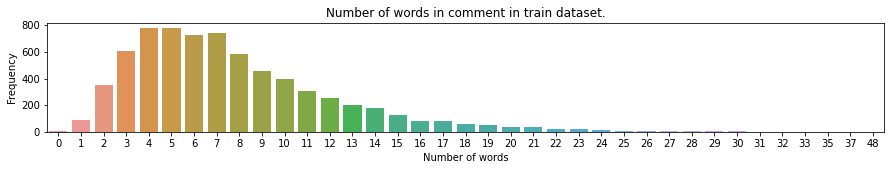

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


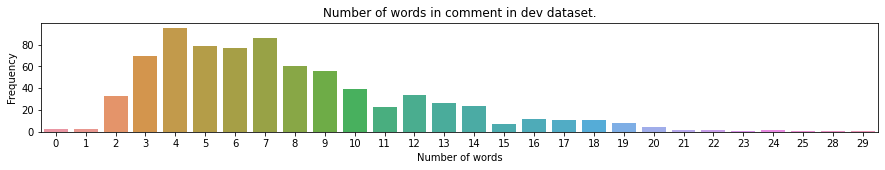

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


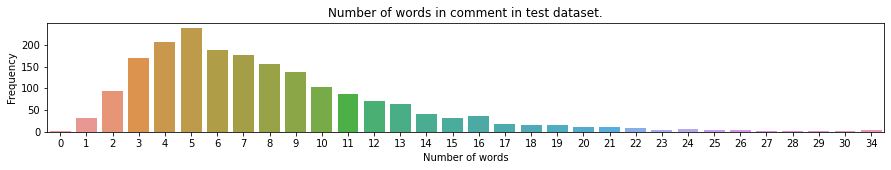

In [59]:
# Độ dài cmt
def plot_number_word(X, name):
    l = []
    for i in range(len(X)):
        l.append(len(X[i].split()))
    plt.figure(figsize = (15, 2))
    sns.countplot(l)
    plt.title("Number of words in comment in " + name + ' dataset.')
    plt.xlabel("Number of words")
    plt.ylabel("Frequency")
    plt.show()

plot_number_word(X_train, 'train')
plot_number_word(X_dev, 'dev')
plot_number_word(X_test, 'test')

In [60]:
X_train[:3]

array(['giá giá tiền size', 'hơi đắt', 'hôi mùi dầu'], dtype=object)

In [61]:
y_train[:3]

array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# ================================================================

# Process
fastText: 200000
* Have - 3888
* No - 257

multi: 21591
* Have - 2126
* No - 2019

wiki: 231486
* Have - 3395
* No - 750

bpemb: 200000
* Have - 2684
* No - 1461

In [62]:
model_name = ["Native Bayes",
              "Logistic Regression",
              "SVM",
              "Text-CNN-fastText",
              "Text-CNN-Wikipedia Word2vec",
              "Text-CNN-BPEmb",
              "Text-CNN-MULTI_WC_F_E_B",
              "Bi-GRU-fastText",
              "Bi-GRU-Wikipedia Word2vec",
              "Bi-GRU-BPEmb",
              "Bi-GRU-MULTI_WC_F_E_B",
              "BERT XLM-R",
              "BERT MULTILINGUAL"
              "FPTAI (cased)",
              "PhoBERT"]

# Model---Naive Bayes

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = BinaryRelevance(ComplementNB())
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu record
df = pd.DataFrame({"Model": [model_name[0]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

Accuracy train:  0.8261240751280592
Accuracy dev:  0.35149156939040205
Accuracy test:  0.3606811145510836
F1 macro test:  0.4514536954872778
Recall macro test:  0.3388594200198905
Precision macro test:  0.8622121704069586
F1 micro test:  0.5752541532358045
Recall micro test:  0.44123240775960443
Precision micro test:  0.8262108262108262


# Model---Logistic Regression

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = MultiOutputClassifier(LogisticRegression())
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu record
df = pd.DataFrame({"Model": [model_name[1]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

Accuracy train:  0.3948491747296528
Accuracy dev:  0.3942931258106355
Accuracy test:  0.3926728586171311
F1 macro test:  0.5241229187943804
Recall macro test:  0.41896215460850517
Precision macro test:  0.7855860265373713
F1 micro test:  0.6315302820157189
Recall micro test:  0.5195891974134652
Precision micro test:  0.8049499116087213


# Model---SVM

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = MultiOutputClassifier(SVC())
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu record
df = pd.DataFrame({"Model": [model_name[2]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

Accuracy train:  0.9147694934547524
Accuracy dev:  0.4409857328145266
Accuracy test:  0.4324045407636739
F1 macro test:  0.5545071679810701
Recall macro test:  0.4497144303015926
Precision macro test:  0.849304599637254
F1 micro test:  0.6578527467517666
Recall micro test:  0.5488779003423355
Precision micro test:  0.8208191126279863


# ========================================================

# Model---Text-CNN---FastText

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 30
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/cc.vi.300.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu record
df = pd.DataFrame({"Model": [model_name[3]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

Epoch 1/10
28/28 [==============================] - 22s 227ms/step - loss: 0.5166 - accuracy: 0.1336 - val_loss: 0.3133 - val_accuracy: 0.2879
Epoch 2/10
28/28 [==============================] - 6s 200ms/step - loss: 0.2899 - accuracy: 0.3605 - val_loss: 0.2485 - val_accuracy: 0.5097
Epoch 3/10
28/28 [==============================] - 6s 201ms/step - loss: 0.2252 - accuracy: 0.5595 - val_loss: 0.2043 - val_accuracy: 0.5901
Epoch 4/10
28/28 [==============================] - 6s 201ms/step - loss: 0.1763 - accuracy: 0.6406 - val_loss: 0.1701 - val_accuracy: 0.6213
Epoch 5/10
28/28 [==============================] - 6s 202ms/step - loss: 0.1405 - accuracy: 0.7105 - val_loss: 0.1505 - val_accuracy: 0.6641
Epoch 6/10
28/28 [==============================] - 8s 291ms/step - loss: 0.1146 - accuracy: 0.7651 - val_loss: 0.1401 - val_accuracy: 0.6952
Epoch 7/10
28/28 [==============================] - 6s 202ms/step - loss: 0.0938 - accuracy: 0.8017 - val_loss: 0.1351 - val_accuracy: 0.7043
Epoch

# Model---Text-CNN---Wikipedia Word2vec

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):

    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 30
embedding_dim = 400
vocab_size = len(tokenizer.word_index) + 1
model_filepath = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/wiki.vi.model.bin'
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu record
df = pd.DataFrame({"Model": [model_name[4]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = 'a')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Epoch 1/10
28/28 [==============================] - 9s 276ms/step - loss: 0.4926 - accuracy: 0.2979 - val_loss: 0.2279 - val_accuracy: 0.5668
Epoch 2/10
28/28 [==============================] - 7s 265ms/step - loss: 0.1945 - accuracy: 0.6354 - val_loss: 0.1874 - val_accuracy: 0.6278
Epoch 3/10
28/28 [==============================] - 7s 260ms/step - loss: 0.1488 - accuracy: 0.7060 - val_loss: 0.1712 - val_accuracy: 0.6265
Epoch 4/10
28/28 [==============================] - 7s 264ms/step - loss: 0.1216 - accuracy: 0.7526 - val_loss: 0.1628 - val_accuracy: 0.6485
Epoch 5/10
28/28 [==============================] - 8s 269ms/step - loss: 0.0989 - accuracy: 0.7854 - val_loss: 0.1601 - val_accuracy: 0.6615
Epoch 6/10
28/28 [==============================] - 7s 265ms/step - loss: 0.0832 - accuracy: 0.8100 - val_loss: 0.1612 - val_accuracy: 0.6537
Epoch 7/10
28/28 [==============================] - 7s 266ms/step - loss: 0.0679 - accuracy: 0.8201 - val_loss: 0.1656 - val_accuracy: 0.6680
Epoch 

# Model---Text-CNN---BPEmb

In [ ]:
!pip install bpemb

x_train = X_train
x_dev = X_dev
x_test = X_test

from bpemb import BPEmb
bpemb_vi = BPEmb(lang = 'vi', dim = 300, vs = 200000)

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]
    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors
    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 30
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
model_filepath = bpemb_vi.emb_file
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu record
df = pd.DataFrame({"Model": [model_name[5]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

     |████████████████████████████████| 1.2MB 11.6MB/s 
downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs200000.model


100%|██████████| 3659179/3659179 [00:00<00:00, 3662717.45B/s]


downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs200000.d300.w2v.bin.tar.gz


100%|██████████| 223674818/223674818 [00:15<00:00, 14679520.72B/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


Epoch 1/10
28/28 [==============================] - 7s 206ms/step - loss: 0.4732 - accuracy: 0.1598 - val_loss: 0.2737 - val_accuracy: 0.4630
Epoch 2/10
28/28 [==============================] - 5s 193ms/step - loss: 0.2469 - accuracy: 0.5228 - val_loss: 0.2196 - val_accuracy: 0.5668
Epoch 3/10
28/28 [==============================] - 6s 197ms/step - loss: 0.1891 - accuracy: 0.6422 - val_loss: 0.1888 - val_accuracy: 0.6018
Epoch 4/10
28/28 [==============================] - 5s 195ms/step - loss: 0.1535 - accuracy: 0.6972 - val_loss: 0.1684 - val_accuracy: 0.6304
Epoch 5/10
28/28 [==============================] - 5s 192ms/step - loss: 0.1310 - accuracy: 0.7330 - val_loss: 0.1583 - val_accuracy: 0.6407
Epoch 6/10
28/28 [==============================] - 5s 195ms/step - loss: 0.1075 - accuracy: 0.7712 - val_loss: 0.1533 - val_accuracy: 0.6498
Epoch 7/10
28/28 [==============================] - 5s 195ms/step - loss: 0.0896 - accuracy: 0.7998 - val_loss: 0.1488 - val_accuracy: 0.6628
Epoch 

# Model---Text-CNN---MULTI_WC_F_E_B

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 30
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/MULTI_W_F_B_E.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[6]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

Epoch 1/10
28/28 [==============================] - 7s 206ms/step - loss: 0.5327 - accuracy: 0.0968 - val_loss: 0.3243 - val_accuracy: 0.2503
Epoch 2/10
28/28 [==============================] - 5s 192ms/step - loss: 0.3040 - accuracy: 0.3403 - val_loss: 0.2577 - val_accuracy: 0.4617
Epoch 3/10
28/28 [==============================] - 5s 193ms/step - loss: 0.2358 - accuracy: 0.5244 - val_loss: 0.2092 - val_accuracy: 0.5901
Epoch 4/10
28/28 [==============================] - 5s 192ms/step - loss: 0.1843 - accuracy: 0.6440 - val_loss: 0.1754 - val_accuracy: 0.6420
Epoch 5/10
28/28 [==============================] - 5s 193ms/step - loss: 0.1479 - accuracy: 0.7080 - val_loss: 0.1549 - val_accuracy: 0.6796
Epoch 6/10
28/28 [==============================] - 5s 191ms/step - loss: 0.1221 - accuracy: 0.7664 - val_loss: 0.1422 - val_accuracy: 0.6861
Epoch 7/10
28/28 [==============================] - 5s 191ms/step - loss: 0.0999 - accuracy: 0.7964 - val_loss: 0.1382 - val_accuracy: 0.7017
Epoch 

# =============================================

# Model---Bi-GRU---FastText

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 30
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/cc.vi.300.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[7]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

Epoch 1/10
28/28 [==============================] - 18s 265ms/step - loss: 0.6000 - accuracy: 0.0860 - val_loss: 0.3550 - val_accuracy: 0.2503
Epoch 2/10
28/28 [==============================] - 6s 218ms/step - loss: 0.3377 - accuracy: 0.2581 - val_loss: 0.3066 - val_accuracy: 0.2905
Epoch 3/10
28/28 [==============================] - 6s 216ms/step - loss: 0.2926 - accuracy: 0.3229 - val_loss: 0.2500 - val_accuracy: 0.4345
Epoch 4/10
28/28 [==============================] - 6s 217ms/step - loss: 0.2361 - accuracy: 0.4725 - val_loss: 0.2110 - val_accuracy: 0.5577
Epoch 5/10
28/28 [==============================] - 6s 216ms/step - loss: 0.1925 - accuracy: 0.5825 - val_loss: 0.1818 - val_accuracy: 0.6083
Epoch 6/10
28/28 [==============================] - 6s 217ms/step - loss: 0.1608 - accuracy: 0.6544 - val_loss: 0.1652 - val_accuracy: 0.6472
Epoch 7/10
28/28 [==============================] - 6s 217ms/step - loss: 0.1409 - accuracy: 0.7156 - val_loss: 0.1541 - val_accuracy: 0.6822
Epoch

# Model---Bi-GRU---Wikipedia Word2vec

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 30
embedding_dim = 400
vocab_size = len(tokenizer.word_index) + 1
model_filepath = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/wiki.vi.model.bin'
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[8]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Epoch 1/10
28/28 [==============================] - 14s 316ms/step - loss: 0.5009 - accuracy: 0.2177 - val_loss: 0.3059 - val_accuracy: 0.3372
Epoch 2/10
28/28 [==============================] - 7s 265ms/step - loss: 0.2940 - accuracy: 0.3427 - val_loss: 0.2526 - val_accuracy: 0.4643
Epoch 3/10
28/28 [==============================] - 8s 269ms/step - loss: 0.2394 - accuracy: 0.4791 - val_loss: 0.2014 - val_accuracy: 0.5681
Epoch 4/10
28/28 [==============================] - 7s 267ms/step - loss: 0.1919 - accuracy: 0.6004 - val_loss: 0.1739 - val_accuracy: 0.6148
Epoch 5/10
28/28 [==============================] - 8s 270ms/step - loss: 0.1641 - accuracy: 0.6527 - val_loss: 0.1607 - val_accuracy: 0.6472
Epoch 6/10
28/28 [==============================] - 8s 268ms/step - loss: 0.1395 - accuracy: 0.7134 - val_loss: 0.1525 - val_accuracy: 0.6654
Epoch 7/10
28/28 [==============================] - 8s 269ms/step - loss: 0.1272 - accuracy: 0.7402 - val_loss: 0.1460 - val_accuracy: 0.6861
Epoch

# Model---Bi-GRU---BPEmb

In [ ]:
!pip install bpemb

x_train = X_train
x_dev = X_dev
x_test = X_test

from bpemb import BPEmb
bpemb_vi = BPEmb(lang = 'vi', dim = 300, vs = 200000)

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    """
    Get the embedding matrix of the word2vec model
    :param model_filepath: the file path to the pre-build word2vec model
    :param word2id: the directory mapping from word to id
    :return: the embedding matrix of the word2vec model
    """
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 30
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
model_filepath = bpemb_vi.emb_file
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[9]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


Epoch 1/10
28/28 [==============================] - 12s 259ms/step - loss: 0.5816 - accuracy: 0.1211 - val_loss: 0.3387 - val_accuracy: 0.2555
Epoch 2/10
28/28 [==============================] - 6s 215ms/step - loss: 0.3238 - accuracy: 0.2828 - val_loss: 0.2784 - val_accuracy: 0.4228
Epoch 3/10
28/28 [==============================] - 6s 213ms/step - loss: 0.2627 - accuracy: 0.4406 - val_loss: 0.2201 - val_accuracy: 0.5409
Epoch 4/10
28/28 [==============================] - 6s 214ms/step - loss: 0.2101 - accuracy: 0.5592 - val_loss: 0.1872 - val_accuracy: 0.6018
Epoch 5/10
28/28 [==============================] - 6s 217ms/step - loss: 0.1780 - accuracy: 0.6169 - val_loss: 0.1663 - val_accuracy: 0.6368
Epoch 6/10
28/28 [==============================] - 6s 217ms/step - loss: 0.1500 - accuracy: 0.6863 - val_loss: 0.1499 - val_accuracy: 0.6602
Epoch 7/10
28/28 [==============================] - 6s 215ms/step - loss: 0.1302 - accuracy: 0.7281 - val_loss: 0.1429 - val_accuracy: 0.6822
Epoch

# Model---Bi-GRU---MULTI_WC_F_E_B

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 30
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/MULTI_W_F_B_E.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[10]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

Epoch 1/10
28/28 [==============================] - 12s 257ms/step - loss: 0.6280 - accuracy: 0.0852 - val_loss: 0.3711 - val_accuracy: 0.2192
Epoch 2/10
28/28 [==============================] - 6s 213ms/step - loss: 0.3508 - accuracy: 0.2361 - val_loss: 0.3254 - val_accuracy: 0.2503
Epoch 3/10
28/28 [==============================] - 6s 213ms/step - loss: 0.3179 - accuracy: 0.2456 - val_loss: 0.2995 - val_accuracy: 0.3074
Epoch 4/10
28/28 [==============================] - 6s 212ms/step - loss: 0.2834 - accuracy: 0.3375 - val_loss: 0.2463 - val_accuracy: 0.3956
Epoch 5/10
28/28 [==============================] - 6s 213ms/step - loss: 0.2311 - accuracy: 0.4559 - val_loss: 0.2031 - val_accuracy: 0.5422
Epoch 6/10
28/28 [==============================] - 6s 212ms/step - loss: 0.1840 - accuracy: 0.5992 - val_loss: 0.1763 - val_accuracy: 0.5694
Epoch 7/10
28/28 [==============================] - 6s 214ms/step - loss: 0.1537 - accuracy: 0.6516 - val_loss: 0.1633 - val_accuracy: 0.6200
Epoch

# =========================================================

In [ ]:
max_len = max([len(text.split(" ")) for text in X_train])

# BERT XLM-R

In [ ]:
max_len = max([len(text.split(" ")) for text in X_train])
class BuildDataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, X, y, max_len):
        self.tokenizer = tokenizer
        self.comment_text = X
        self.targets = y
        self.max_len = max_len

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'input_ids': torch.tensor(ids, dtype=torch.long),
            'attention_mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.targets[index], dtype=torch.float)
        }

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels = 12)
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

# Chuan bi data
train_dataset = BuildDataset(tokenizer, X_train, y_train, max_len = max_len)
dev_dataset = BuildDataset(tokenizer,  X_dev, y_dev, max_len = max_len)
test_dataset = BuildDataset(tokenizer,  X_test, y_test, max_len = max_len)

# Chuan bi mo hinh

training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    learning_rate = 8e-05,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

def convert_predict_label(predict_label_train):
    for i in range(len(predict_label_train)):
        for j in range(len(predict_label_train[i])):
            if predict_label_train[i][j] > 0.5:
                predict_label_train[i][j] = 1
            else:
                predict_label_train[i][j] = 0
    return predict_label_train

y_train_pred = convert_predict_label(train_dataset_pred.predictions)
y_dev_pred = convert_predict_label(dev_dataset_pred.predictions)
y_test_pred = convert_predict_label(test_dataset_pred.predictions)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/ACD_Process'
result.to_csv(path + '/' + 'xlm-r.csv', index=False)
result.head()

#Lưu record
df = pd.DataFrame({"Model": [model_name[11]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

***** Running training *****
  Num examples = 7028
  Num Epochs = 7
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3080
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length wi

Step,Training Loss
500,0.307700
1000,0.174900
1500,0.136900
2000,0.112600
2500,0.089400
3000,0.071300


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_ma

***** Running Prediction *****
  Num examples = 771
  Batch size = 16
***** Running Prediction *****
  Num examples = 1938
  Batch size = 16


Accuracy train:  0.8373648264086511
Accuracy dev:  0.5979247730220493
Accuracy test:  0.6444788441692466
F1 macro test:  0.7819406583694389
Recall macro test:  0.7493981651529175
Precision macro test:  0.822271014330635
F1 micro test:  0.7949690556997405
Recall micro test:  0.7573221757322176
Precision micro test:  0.8365546218487395


# BERT MULTILINGUAL

In [ ]:
max_len = max([len(text.split(" ")) for text in X_train])
class BuildDataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, X, y, max_len):
        self.tokenizer = tokenizer
        self.comment_text = X
        self.targets = y
        self.max_len = max_len

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'input_ids': torch.tensor(ids, dtype=torch.long),
            'attention_mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.targets[index], dtype=torch.float)
        }

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels = 12)
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

# Chuan bi data
train_dataset = BuildDataset(tokenizer, X_train, y_train, max_len = max_len)
dev_dataset = BuildDataset(tokenizer,  X_dev, y_dev, max_len = max_len)
test_dataset = BuildDataset(tokenizer,  X_test, y_test, max_len = max_len)

# Chuan bi mo hinh

training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    learning_rate = 8e-05,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

def convert_predict_label(predict_label_train):
    for i in range(len(predict_label_train)):
        for j in range(len(predict_label_train[i])):
            if predict_label_train[i][j] > 0.5:
                predict_label_train[i][j] = 1
            else:
                predict_label_train[i][j] = 0
    return predict_label_train

y_train_pred = convert_predict_label(train_dataset_pred.predictions)
y_dev_pred = convert_predict_label(dev_dataset_pred.predictions)
y_test_pred = convert_predict_label(test_dataset_pred.predictions)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/ACD_Process'
result.to_csv(path + '/' + 'bert-multi.csv', index=False)
result.head()

#Lưu record
df = pd.DataFrame({"Model": [model_name[12]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

***** Running training *****
  Num examples = 7028
  Num Epochs = 7
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3080
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length wi

Step,Training Loss
500,0.289800
1000,0.165500
1500,0.122500
2000,0.093200
2500,0.066500
3000,0.046100


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_ma

***** Running Prediction *****
  Num examples = 771
  Batch size = 16
***** Running Prediction *****
  Num examples = 1938
  Batch size = 16


Accuracy train:  0.9231644849174729
Accuracy dev:  0.6381322957198443
Accuracy test:  0.6377708978328174
F1 macro test:  0.776327285143917
Recall macro test:  0.7525022080803826
Precision macro test:  0.8034979986881198
F1 micro test:  0.7906428150186751
Recall micro test:  0.7649296310384176
Precision micro test:  0.8181448331977217


# BERT FPTAI/vibert-base-cased



In [ ]:
max_len = max([len(text.split(" ")) for text in X_train])
class BuildDataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, X, y, max_len):
        self.tokenizer = tokenizer
        self.comment_text = X
        self.targets = y
        self.max_len = max_len

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'input_ids': torch.tensor(ids, dtype=torch.long),
            'attention_mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.targets[index], dtype=torch.float)
        }

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('FPTAI/vibert-base-cased', num_labels = 12)
tokenizer = AutoTokenizer.from_pretrained('FPTAI/vibert-base-cased')

# Chuan bi data
train_dataset = BuildDataset(tokenizer, X_train, y_train, max_len = max_len)
dev_dataset = BuildDataset(tokenizer,  X_dev, y_dev, max_len = max_len)
test_dataset = BuildDataset(tokenizer,  X_test, y_test, max_len = max_len)

# Chuan bi mo hinh

training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

def convert_predict_label(predict_label_train):
    for i in range(len(predict_label_train)):
        for j in range(len(predict_label_train[i])):
            if predict_label_train[i][j] > 0.5:
                predict_label_train[i][j] = 1
            else:
                predict_label_train[i][j] = 0
    return predict_label_train

y_train_pred = convert_predict_label(train_dataset_pred.predictions)
y_dev_pred = convert_predict_label(dev_dataset_pred.predictions)
y_test_pred = convert_predict_label(test_dataset_pred.predictions)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/ACD_Process'
result.to_csv(path + '/' + 'vibert-base-cased.csv', index=False)
result.head()

#Lưu record
df = pd.DataFrame({"Model": [model_name[13]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

Some weights of the model checkpoint at FPTAI/vibert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not in

***** Running training *****
  Num examples = 7028
  Num Epochs = 7
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3080
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length wi

Step,Training Loss
500,0.353400
1000,0.180500
1500,0.124500
2000,0.085500
2500,0.055600
3000,0.039200


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_ma

***** Running Prediction *****
  Num examples = 771
  Batch size = 16
***** Running Prediction *****
  Num examples = 1938
  Batch size = 16


Accuracy train:  0.9435116676152533
Accuracy dev:  0.6018158236057068
Accuracy test:  0.6248710010319918
F1 macro test:  0.7657405542812664
Recall macro test:  0.7262557124589287
Precision macro test:  0.814073635640693
F1 micro test:  0.7801956478338989
Recall micro test:  0.7432483834157474
Precision micro test:  0.8210084033613445


# BERT vinai/phobert-base

In [ ]:
class BuildDataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, X, y, max_len):
        self.tokenizer = tokenizer
        self.comment_text = X
        self.targets = y
        self.max_len = max_len

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'input_ids': torch.tensor(ids, dtype=torch.long),
            'attention_mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.targets[index], dtype=torch.float)
        }

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('vinai/phobert-base', num_labels = 12)
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')

# Chuan bi data
train_dataset = BuildDataset(tokenizer, X_train, y_train, max_len = max_len)
dev_dataset = BuildDataset(tokenizer,  X_dev, y_dev, max_len = max_len)
test_dataset = BuildDataset(tokenizer,  X_test, y_test, max_len = max_len)

# Chuan bi mo hinh

training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

def convert_predict_label(predict_label_train):
    for i in range(len(predict_label_train)):
        for j in range(len(predict_label_train[i])):
            if predict_label_train[i][j] > 0.5:
                predict_label_train[i][j] = 1
            else:
                predict_label_train[i][j] = 0
    return predict_label_train

y_train_pred = convert_predict_label(train_dataset_pred.predictions)
y_dev_pred = convert_predict_label(dev_dataset_pred.predictions)
y_test_pred = convert_predict_label(test_dataset_pred.predictions)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/ACD_Process'
result.to_csv(path + '/' + 'phoBert.csv', index=False)
result.head()

#Lưu record
df = pd.DataFrame({"Model": [model_name[14]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Process.csv",
          index = None, header = False, mode = "a")

https://huggingface.co/vinai/phobert-base/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpf98m4u6s


storing https://huggingface.co/vinai/phobert-base/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
creating metadata file for /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
loading configuration file https://huggingface.co/vinai/phobert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  

storing https://huggingface.co/vinai/phobert-base/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85
creating metadata file for /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85
loading weights file https://huggingface.co/vinai/phobert-base/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

storing https://huggingface.co/vinai/phobert-base/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
creating metadata file for /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpd08ztzer


storing https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes in cache at /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd
creating metadata file for /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd
loading file https://huggingface.co/vinai/phobert-base/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
loading file https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes from cache at /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd
loading file https://huggingface

Adding <mask> to the vocabulary
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 7028
  Num Epochs = 7
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3080
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this stra

Step,Training Loss
500,0.349600
1000,0.145500
1500,0.098300
2000,0.071100
2500,0.050800
3000,0.039400


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_ma

***** Running Prediction *****
  Num examples = 771
  Batch size = 16
***** Running Prediction *****
  Num examples = 1938
  Batch size = 16


Accuracy train:  0.9395276038702334
Accuracy dev:  0.6731517509727627
Accuracy test:  0.6769865841073271
F1 macro test:  0.8150518739884016
Recall macro test:  0.795678763273961
Precision macro test:  0.8371954518734382
F1 micro test:  0.8225461613216715
Recall micro test:  0.804868771395968
Precision micro test:  0.8410174880763116
